# Алибеков Аслан 
# А-13а-20
# Лабораторная работа №4

## https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

### Набор данных содержит опрос об удовлетворенности пассажиров авиакомпаний.Необходимо предсказать удовлетворенность пассажиров.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as ses
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings

### Загрузка данных для обучения и тестирования

In [2]:
train_df=pd.read_csv("train.csv", index_col = 0)
test_df=pd.read_csv("test.csv", index_col = 0)

1. **Пол:** Пол пассажиров (женщина, мужчина)

2. **Тип клиента:** Тип клиента (лояльный клиент, нелояльный клиент)

3. **Возраст:** Фактический возраст пассажиров

4. **Тип путешествия:** Цель полета пассажиров (личная поездка, деловая поездка)

5. **Класс:** Класс проезда в самолете пассажиров (Бизнес, Эко, Эко Плюс)

6. **Дальность полета:** Расстояние перелета в рамках данного путешествия

7. **Услуга Wi-Fi на борту:** Уровень удовлетворенности услугой Wi-Fi на борту (0: Неприменимо; 1-5)

8. **Удобное время отправления/прибытия:** Уровень удовлетворенности удобным временем отправления/прибытия

9. **Простота онлайн-бронирования:** Уровень удовлетворенности онлайн-бронированием

10. **Местоположение выхода на посадку:** Уровень удовлетворенности местоположением выхода на посадку

11. **Еда и напитки:** Уровень удовлетворенности едой и напитками

12. **Онлайн-посадка:** Уровень удовлетворенности онлайн-посадкой

13. **Комфорт сиденья:** Уровень удовлетворенности комфортом сиденья

14. **Развлечения в полете:** Уровень удовлетворенности развлечениями в полете

15. **Обслуживание на борту:** Уровень удовлетворенности обслуживанием на борту

16. **Обслуживание в номере:** Уровень удовлетворенности обслуживанием в номере

17. **Обработка багажа:** Уровень удовлетворенности обработкой багажа

18. **Услуга регистрации:** Уровень удовлетворенности услугой регистрации

19. **Обслуживание в полете:** Уровень удовлетворенности обслуживанием в полете

20. **Чистота:** Уровень удовлетворенности чистотой

21. **Задержка вылета в минутах:** Задержка вылета на несколько минут

22. **Задержка прибытия в минутах:** Задержка прибытия на несколько минут

23. **Удовлетворенность:** Уровень удовлетворенности авиакомпанией (удовлетворенность, нейтральная или неудовлетворенность)


### EDA

In [3]:
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [4]:
test_df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [5]:
train_df.shape

(103904, 24)

In [6]:
test_df.shape

(25976, 24)

In [7]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
test_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [10]:
train_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
train_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Визуализация переменных относительно уровня удовлетворенности

In [12]:
warnings.filterwarnings("ignore")

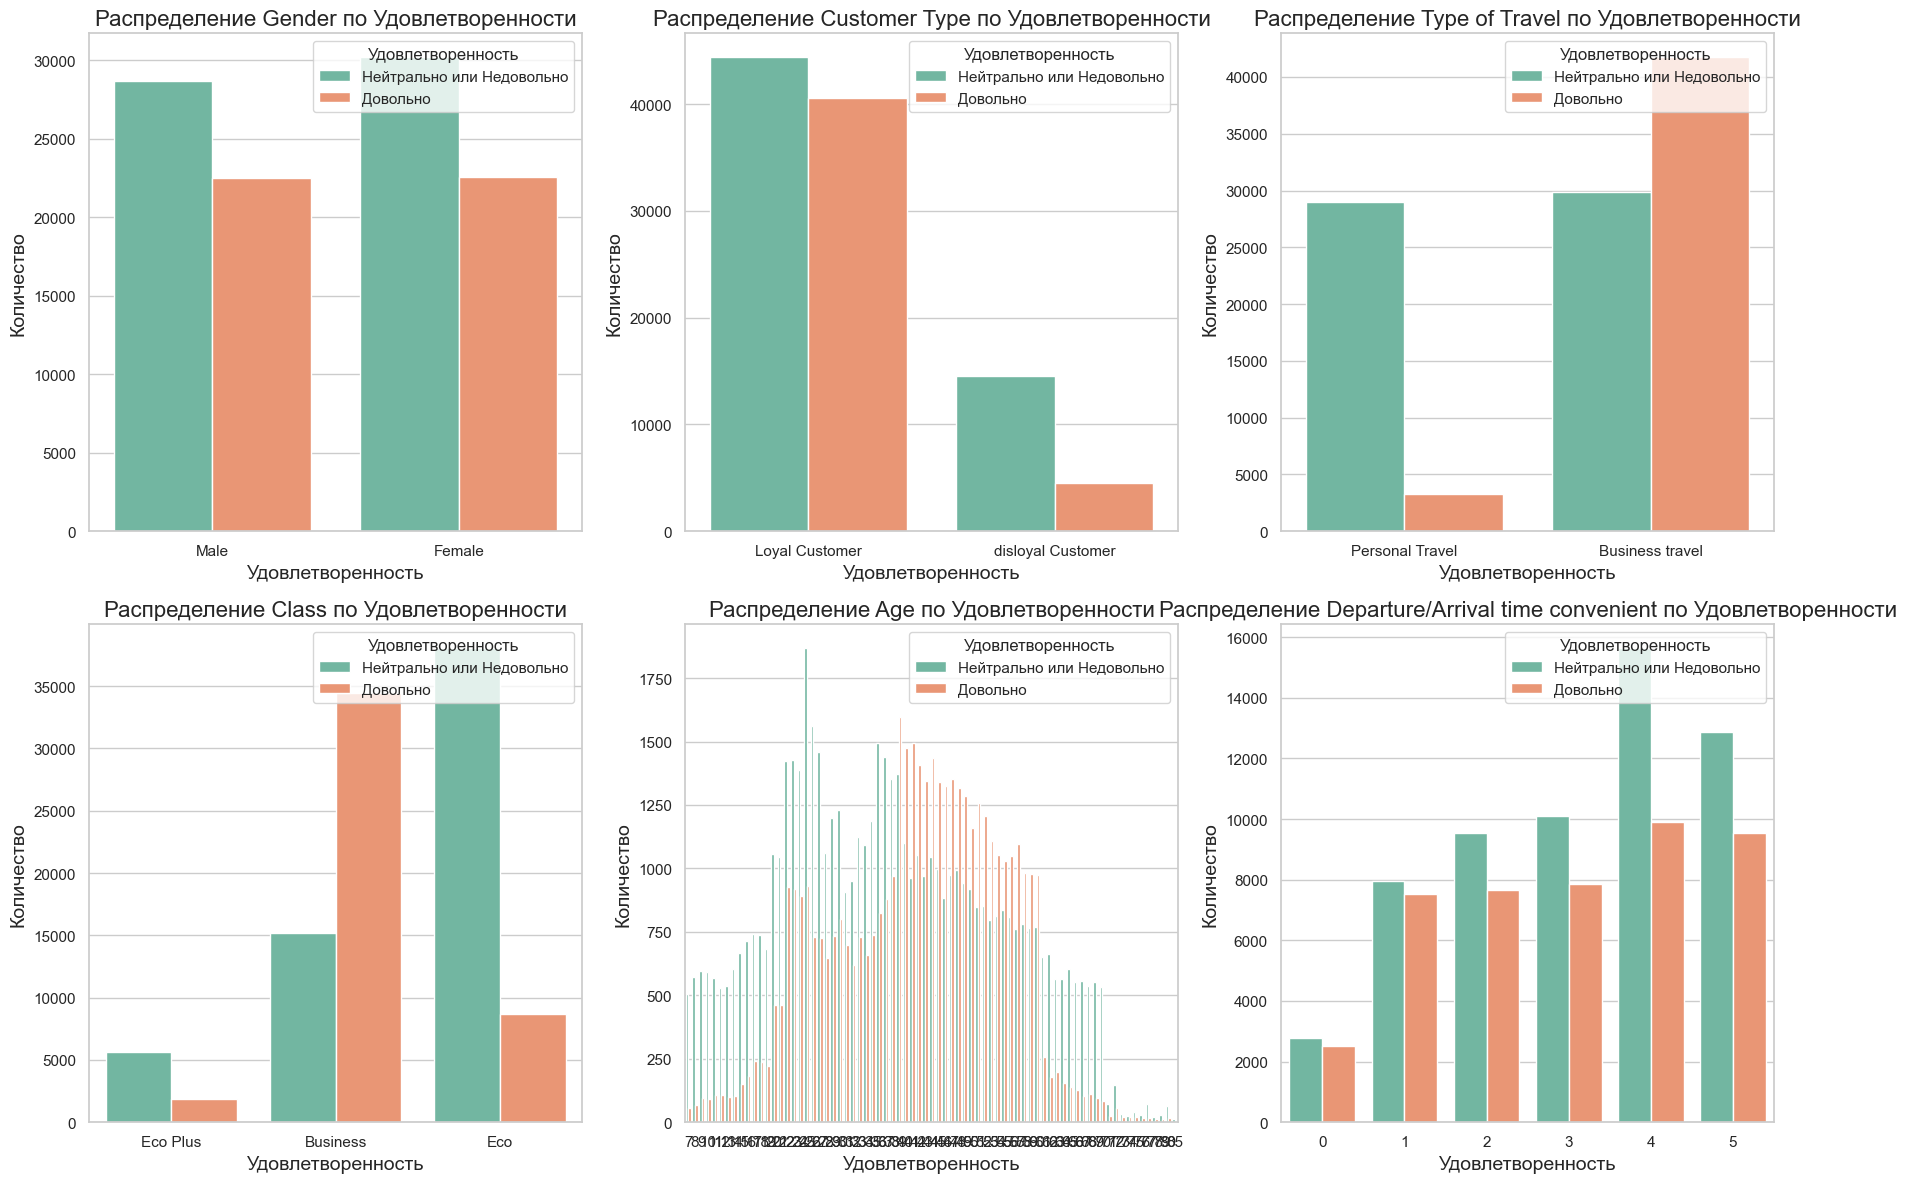

In [13]:
label_data = ["Gender", "Customer Type", "Type of Travel", "Class", "Age", "Departure/Arrival time convenient"]

ses.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, col in enumerate(label_data):
    row_index, col_index = divmod(i, 3)
    ses.countplot(x=col, hue='satisfaction', data=train_df, palette='Set2', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_xlabel('Удовлетворенность', fontsize=14)
    axes[row_index, col_index].set_ylabel('Количество', fontsize=14)
    axes[row_index, col_index].set_title(f'Распределение {col} по Удовлетворенности', fontsize=16)
    axes[row_index, col_index].legend(title='Удовлетворенность', loc='upper right', labels=['Нейтрально или Недовольно', 'Довольно'])

plt.tight_layout()
plt.show()

### Преобразование переменных в категориальные

In [14]:
obj_data= ["Gender", "Customer Type", "Type of Travel", "Class", "Age", "Departure/Arrival time convenient", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
encoder=LabelEncoder()
for col in obj_data:
    train_df[col] = encoder.fit_transform(train_df[col])

In [15]:
X_train = train_df.drop('satisfaction', axis=1)  
y_train = train_df['satisfaction']

X_test = test_df.drop('satisfaction', axis=1)  
y_test = test_df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

###  Восстановление пропущенных значений

In [16]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

### Стандартизация 

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### Проверка корректности стандартизации

In [18]:
X_test_scaled.mean()

0.000414389044948204

In [19]:
X_test_scaled.std()

1.0008098281587432

### Random Forest Classifier

In [20]:
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
accuracy=rfc.score(X_test_scaled, y_test)
print("accuracy =", round(accuracy * 100, 2), "%")

accuracy = 96.42 %


### Logistic Regression

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy =", round(accuracy * 100, 2), "%")

Accuracy = 87.8 %


### KNN

### Кросс-валидация с количеством разбиений выборки = 5

In [22]:
k_values = list(range(1, 16))

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]

In [23]:
optimal_k

11

In [24]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.05%


**Результаты:**

Random Forest: Точность - 96.42%

Logistic Regression: Точность - 87.8%

KNN: Точность - 93.05%

### Матрицы ошибок

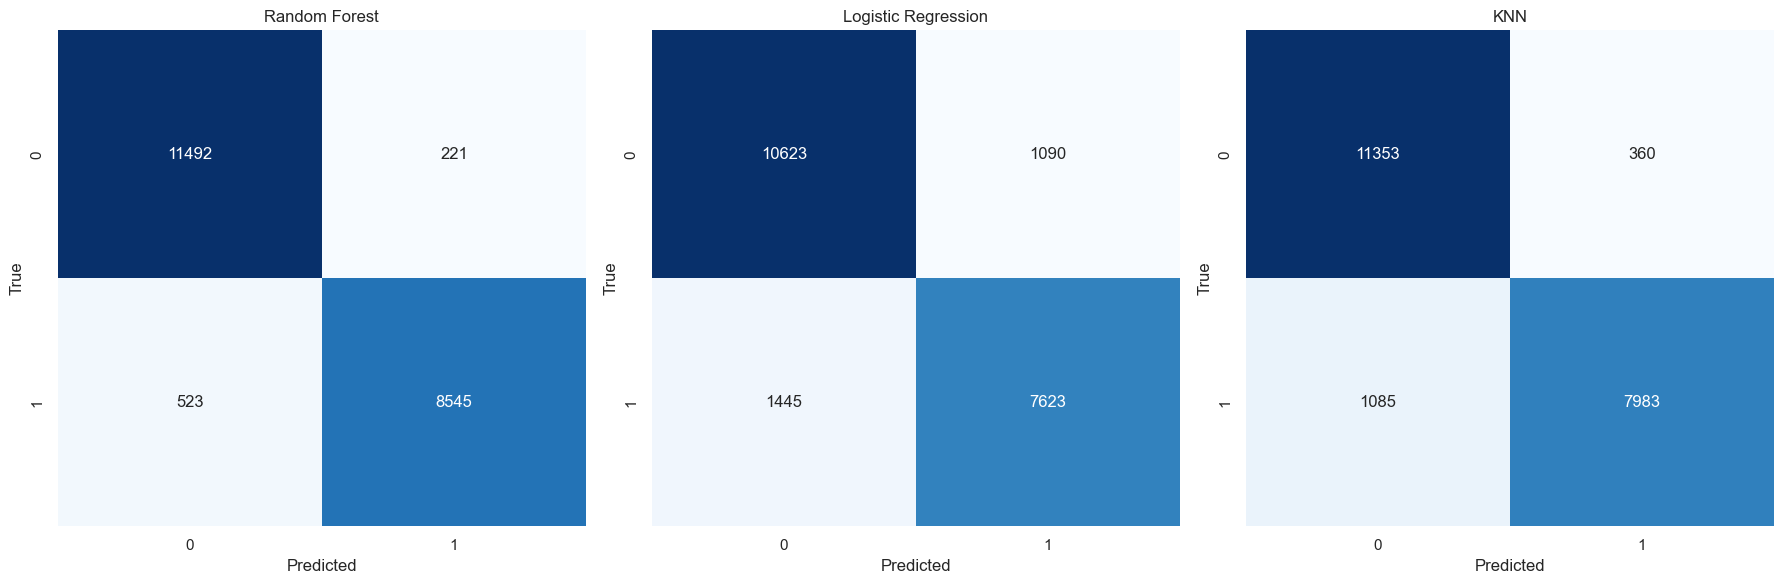

In [27]:
rfc_pred = rfc.predict(X_test_scaled)
rfc_cm = confusion_matrix(y_test, rfc_pred)

logreg_pred = logreg.predict(X_test_scaled)
logreg_cm = confusion_matrix(y_test, logreg_pred)

knn_pred = knn.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, knn_pred)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

ses.heatmap(rfc_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

ses.heatmap(logreg_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

ses.heatmap(knn_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('KNN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()